# PW4: Genetic algorithms for optimization
*Alexandra Korukova, Samuel Mayor*  
*HEIG-VD - MLG - 30.05.2019*

In [1]:
from scipy import sin, cos, tan, arctan, arctan2, arccos, pi
import numpy as np
import math
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import GAllele
from pyevolve import Mutators
from pyevolve import Initializators
from pyevolve import DBAdapters
from pyevolve import Crossovers
from pyevolve import Consts
from pyevolve import Selectors
import sys, random
import matplotlib.pyplot as plt

In [2]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

In [3]:
def tour_length(matrix, tour):
   """ Returns the total length of the tour """
   total=0
   num_cities=len(tour)
   for i in range(num_cities):
      j=(i+1)%num_cities
      city_i=tour[i]
      city_j=tour[j]
      total+=matrix[city_i,city_j]
   return total

def G1DListTSPInitializator(genome, **args):
   """ The initializator for the TSP """
   genome.clearList()
   lst = [i for i in xrange(genome.getListSize())]

   for i in xrange(genome.getListSize()):
      choice = random.choice(lst)
      lst.remove(choice)
      genome.append(choice)

spherical_distances = []
coords = []

def eval_func(chromosome):
   """ The evaluation function """
   global spherical_distances
   return tour_length(spherical_distances, chromosome)

In [4]:
# source : https://www.johndcook.com/blog/python_longitude_latitude/
def spherical_distance(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians

    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians

    # Compute spherical distance from spherical coordinates.

    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta', phi')
    # cosine( arc length ) =
    # sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length

    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) +
    math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )

    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc*6371

In [5]:
# creates latitude/longitude tuples for each city
coords = []
for i in range(len(LAT)):
    coords.append((LAT[i], LON[i]))

# calculate distances between each city pairs
spherical_distances = np.zeros((14, 14))
for i,c1 in enumerate(coords):
    for j,c2 in enumerate(coords):
        spherical_distances[i, j] = spherical_distance(c1[0], c1[1], c2[0], c2[1])

# set the alleles to the cities numbers
setOfAlleles = GAllele.GAlleles(homogeneous=True)
lst = [ i for i in xrange(len(coords)) ]
a = GAllele.GAlleleList(lst)
setOfAlleles.add(a)

genome = G1DList.G1DList(len(coords))
genome.setParams(allele=setOfAlleles)

genome.evaluator.set(eval_func)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.crossover.set(Crossovers.G1DListCrossoverOX)
genome.initializator.set(G1DListTSPInitializator)

ga = GSimpleGA.GSimpleGA(genome)
ga.setGenerations(i)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setCrossoverRate(1.0)
ga.setMutationRate(0.03)
ga.setPopulationSize(80)

ga.evolve(freq_stats=100)
best = ga.bestIndividual()
print best
print(tour_length(spherical_distances, best))


Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8184.49(8693.30)/5344.02(4793.32)/6820.41(6820.41)]
Gen. 13 (100.00%): Max/Min/Avg Fitness(Raw) [4735.57(6260.02)/3791.70(3493.08)/3946.31(3946.31)]
Total time elapsed: 0.124 seconds.
- GenomeBase
	Score:			 3493.081094
	Fitness:		 3791.703857

	Params:		 {'allele': - GAlleles
	Homogeneous:	 True
	List size:	 1
	Alleles:

Allele for 0 position:
- GAlleleList
	List size:	 14
	Allele Options:	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

}

	Slot [Evaluator] (Count: 1)
		Name: eval_func - Weight: 0.50
		Doc:  The evaluation function 
	Slot [Initializator] (Count: 1)
		Name: G1DListTSPInitializator - Weight: 0.50
		Doc:  The initializator for the TSP 
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator
   
   .. note:: this mutator is :term:`Data Type Independent`

   
	Slot [Crossover] (Count: 1)
		Name: G1DListCrossoverOX - Weight: 0.50
		Doc:  The OX Crossover for G1DList  (order 

### Testing number of genetations

In [6]:
nb_generations = np.arange(20, 501, 20)
bests = []
for g in nb_generations:
    for i in np.arange(10):
        setOfAlleles = GAllele.GAlleles(homogeneous=True)
        lst = [ i for i in xrange(len(coords)) ]
        a = GAllele.GAlleleList(lst)
        setOfAlleles.add(a)

        genome = G1DList.G1DList(len(coords))
        genome.setParams(allele=setOfAlleles)

        genome.evaluator.set(eval_func)
        genome.mutator.set(Mutators.G1DListMutatorSwap)
        genome.crossover.set(Crossovers.G1DListCrossoverOX)
        genome.initializator.set(G1DListTSPInitializator)

        ga = GSimpleGA.GSimpleGA(genome)
        ga.setGenerations(g)
        ga.setMinimax(Consts.minimaxType["minimize"])
        ga.setCrossoverRate(1.0)
        ga.setMutationRate(0.03)
        ga.setPopulationSize(80)

        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8122.03(8130.46)/5162.40(5152.40)/6768.36(6768.36)]
Gen. 20 (100.00%): Max/Min/Avg Fitness(Raw) [4619.55(5899.87)/3797.32(3710.34)/3849.62(3849.62)]
Total time elapsed: 0.170 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8274.43(8454.84)/5304.09(5095.92)/6895.36(6895.36)]
Gen. 20 (100.00%): Max/Min/Avg Fitness(Raw) [5571.27(6775.15)/4501.71(4318.88)/4642.73(4642.73)]
Total time elapsed: 0.178 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8090.60(8109.34)/5219.02(5197.84)/6742.16(6742.16)]
Gen. 20 (100.00%): Max/Min/Avg Fitness(Raw) [4346.12(5480.16)/3532.28(3392.19)/3621.77(3621.77)]
Total time elapsed: 0.172 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8318.76(8432.41)/5492.12(5374.06)/6932.30(6932.30)]
Gen. 20 (100.00%): Max/Min/Avg Fitness(Raw) [4795.01(6933.60)/3859.27(3493.79)/3995.84(3995.84)]
Total time elapsed: 0.170 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8059.20(8490.81)/5138.51(4631.61)/6716.00(6716.00)]
Ge

Gen. 80 (100.00%): Max/Min/Avg Fitness(Raw) [4563.31(6159.27)/3671.60(3396.36)/3802.76(3802.76)]
Total time elapsed: 0.669 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8241.78(8860.50)/5748.68(5244.44)/6868.15(6868.15)]
Gen. 80 (100.00%): Max/Min/Avg Fitness(Raw) [4677.15(6162.24)/3745.66(3456.13)/3897.63(3897.63)]
Total time elapsed: 0.729 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8073.92(8280.97)/5261.62(5035.95)/6728.27(6728.27)]
Gen. 80 (100.00%): Max/Min/Avg Fitness(Raw) [4831.03(6084.38)/3892.54(3685.02)/4025.86(4025.86)]
Total time elapsed: 0.575 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8080.11(8398.82)/5650.00(5393.59)/6733.42(6733.42)]
Gen. 80 (100.00%): Max/Min/Avg Fitness(Raw) [5367.97(6443.56)/4364.10(4232.81)/4473.31(4473.31)]
Total time elapsed: 0.553 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8085.18(8496.15)/5390.43(4979.54)/6737.65(6737.65)]
Gen. 100 (100.00%): Max/Min/Avg Fitness(Raw) [4631.30(6387.93)/3752.70(3509.84)/3859.41(3859.41)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8283.08(8274.31)/5020.53(5032.48)/6902.57(6902.57)]
Gen. 100 (71.43%): Max/Min/Avg Fitness(Raw) [4400.71(6109.69)/3573.35(3354.52)/3667.26(3667.26)]
Gen. 140 (100.00%): Max/Min/Avg Fitness(Raw) [4344.72(6112.19)/3543.27(3354.52)/3620.60(3620.60)]
Total time elapsed: 1.028 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8049.35(8252.39)/5310.77(5099.33)/6707.79(6707.79)]
Gen. 100 (71.43%): Max/Min/Avg Fitness(Raw) [4680.43(7090.63)/3777.12(3396.36)/3900.35(3900.35)]
Gen. 140 (100.00%): Max/Min/Avg Fitness(Raw) [4339.66(5734.97)/3541.27(3396.36)/3616.38(3616.38)]
Total time elapsed: 1.014 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7934.44(8218.34)/5324.79(5048.44)/6612.03(6612.03)]
Gen. 100 (71.43%): Max/Min/Avg Fitness(Raw) [5435.07(6629.24)/4400.10(4229.88)/4529.23(4529.23)]
Gen. 140 (100.00%): Max/Min/Avg Fitness(Raw) [5525.05(6857.11)/4451.21(4229.88)/4604.21(4604.21)]
Total time elapsed: 0.980 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4591.77(6282.92)/3731.88(3522.84)/3826.48(3826.48)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4560.75(6552.88)/3723.91(3522.84)/3800.63(3800.63)]
Total time elapsed: 1.646 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7991.02(8514.52)/5310.28(4780.06)/6659.18(6659.18)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4519.83(5833.86)/3616.40(3354.52)/3766.52(3766.52)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4460.53(5727.16)/3583.01(3354.52)/3717.11(3717.11)]
Total time elapsed: 1.429 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8028.37(8667.35)/5338.08(4692.34)/6690.31(6690.31)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4624.77(5431.65)/3630.40(3396.36)/3853.97(3853.97)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4573.66(5879.40)/3658.41(3396.36)/3811.38(3811.38)]
Total time elapsed: 1.402 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8046.96(9155.38)/5646.27(4770.60)/6705.80(6705.80)]
Gen. 100 (50.00%): Max/Min/A

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8071.24(8697.06)/5601.98(5079.04)/6726.04(6726.04)]
Gen. 100 (41.67%): Max/Min/Avg Fitness(Raw) [4391.11(5679.21)/3548.85(3354.52)/3659.26(3659.26)]
Gen. 200 (83.33%): Max/Min/Avg Fitness(Raw) [4567.27(6963.50)/3697.20(3354.52)/3806.06(3806.06)]
Gen. 240 (100.00%): Max/Min/Avg Fitness(Raw) [4427.15(5842.90)/3574.59(3354.52)/3689.29(3689.29)]
Total time elapsed: 1.948 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7999.16(8439.15)/5403.81(4987.26)/6665.96(6665.96)]
Gen. 100 (41.67%): Max/Min/Avg Fitness(Raw) [4455.11(6900.40)/3629.19(3354.52)/3712.59(3712.59)]
Gen. 200 (83.33%): Max/Min/Avg Fitness(Raw) [4335.26(5801.87)/3527.50(3354.52)/3612.72(3612.72)]
Gen. 240 (100.00%): Max/Min/Avg Fitness(Raw) [4421.10(6752.41)/3605.06(3354.52)/3684.25(3684.25)]
Total time elapsed: 1.715 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7992.77(7925.53)/4283.01(4403.02)/6660.64(6660.64)]
Gen. 100 (41.67%): Max/Min/Avg Fitness(Raw) [4447.14(7684.90)/36

Gen. 200 (71.43%): Max/Min/Avg Fitness(Raw) [4826.12(6574.74)/3915.67(3685.02)/4021.76(4021.76)]
Gen. 280 (100.00%): Max/Min/Avg Fitness(Raw) [4924.92(7039.61)/3986.92(3685.02)/4104.10(4104.10)]
Total time elapsed: 2.055 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8116.24(8338.35)/4955.09(4658.14)/6763.53(6763.53)]
Gen. 100 (35.71%): Max/Min/Avg Fitness(Raw) [4539.67(6044.45)/3639.68(3354.52)/3783.06(3783.06)]
Gen. 200 (71.43%): Max/Min/Avg Fitness(Raw) [4346.54(5781.29)/3532.34(3354.52)/3622.12(3622.12)]
Gen. 280 (100.00%): Max/Min/Avg Fitness(Raw) [4593.97(6115.89)/3669.73(3354.52)/3828.30(3828.30)]
Total time elapsed: 2.032 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8057.66(8147.71)/5021.91(4908.40)/6714.71(6714.71)]
Gen. 100 (35.71%): Max/Min/Avg Fitness(Raw) [4464.45(5629.26)/3577.77(3354.52)/3720.38(3720.38)]
Gen. 200 (71.43%): Max/Min/Avg Fitness(Raw) [4375.23(6369.71)/3567.98(3354.52)/3646.03(3646.03)]
Gen. 280 (100.00%): Max/Min/Avg Fitness(Raw) [4433.97(6277.97

Gen. 300 (93.75%): Max/Min/Avg Fitness(Raw) [4408.82(6950.24)/3602.36(3354.52)/3674.02(3674.02)]
Gen. 320 (100.00%): Max/Min/Avg Fitness(Raw) [4541.48(5801.87)/3623.21(3354.52)/3784.57(3784.57)]
Total time elapsed: 2.248 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8031.92(8126.12)/5370.24(5277.15)/6693.27(6693.27)]
Gen. 100 (31.25%): Max/Min/Avg Fitness(Raw) [5406.72(6742.26)/4404.86(4255.55)/4505.60(4505.60)]
Gen. 200 (62.50%): Max/Min/Avg Fitness(Raw) [5368.43(6026.78)/4348.02(4255.55)/4473.69(4473.69)]
Gen. 300 (93.75%): Max/Min/Avg Fitness(Raw) [5423.50(7170.72)/4429.56(4255.55)/4519.58(4519.58)]
Gen. 320 (100.00%): Max/Min/Avg Fitness(Raw) [5523.91(6677.96)/4448.96(4255.55)/4603.26(4603.26)]
Total time elapsed: 2.276 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8121.13(8694.98)/5160.41(4479.00)/6767.60(6767.60)]
Gen. 100 (31.25%): Max/Min/Avg Fitness(Raw) [4436.19(5776.94)/3575.15(3354.52)/3696.82(3696.82)]
Gen. 200 (62.50%): Max/Min/Avg Fitness(Raw) [4614.38(6609.49)

Gen. 200 (58.82%): Max/Min/Avg Fitness(Raw) [5459.90(7097.44)/4410.86(4160.62)/4549.91(4549.91)]
Gen. 300 (88.24%): Max/Min/Avg Fitness(Raw) [4576.10(6265.87)/3702.31(3456.13)/3813.42(3813.42)]
Gen. 340 (100.00%): Max/Min/Avg Fitness(Raw) [4502.23(6054.97)/3655.51(3456.13)/3751.86(3751.86)]
Total time elapsed: 2.436 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8173.66(8659.53)/5095.01(4482.85)/6811.39(6811.39)]
Gen. 100 (29.41%): Max/Min/Avg Fitness(Raw) [4571.36(6351.90)/3730.97(3547.51)/3809.47(3809.47)]
Gen. 200 (58.82%): Max/Min/Avg Fitness(Raw) [4764.38(6572.34)/3841.29(3547.51)/3970.32(3970.32)]
Gen. 300 (88.24%): Max/Min/Avg Fitness(Raw) [4757.32(6608.98)/3839.43(3547.51)/3964.43(3964.43)]
Gen. 340 (100.00%): Max/Min/Avg Fitness(Raw) [4530.31(6704.46)/3676.52(3392.19)/3775.26(3775.26)]
Total time elapsed: 3.139 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8183.62(8649.89)/5253.20(4717.69)/6819.69(6819.69)]
Gen. 100 (29.41%): Max/Min/Avg Fitness(Raw) [4532.07(6473.60)

Gen. 100 (26.32%): Max/Min/Avg Fitness(Raw) [4705.17(6221.10)/3740.69(3392.19)/3920.98(3920.98)]
Gen. 200 (52.63%): Max/Min/Avg Fitness(Raw) [4514.95(5880.57)/3630.91(3392.19)/3762.45(3762.45)]
Gen. 300 (78.95%): Max/Min/Avg Fitness(Raw) [4484.44(5601.53)/3598.80(3392.19)/3737.03(3737.03)]
Gen. 380 (100.00%): Max/Min/Avg Fitness(Raw) [4570.88(5955.67)/3661.12(3392.19)/3809.07(3809.07)]
Total time elapsed: 2.662 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8169.95(8201.98)/4783.83(4736.21)/6808.29(6808.29)]
Gen. 100 (26.32%): Max/Min/Avg Fitness(Raw) [4672.12(7271.87)/3808.02(3522.84)/3893.44(3893.44)]
Gen. 200 (52.63%): Max/Min/Avg Fitness(Raw) [4498.11(5797.58)/3665.89(3522.84)/3748.43(3748.43)]
Gen. 300 (78.95%): Max/Min/Avg Fitness(Raw) [4562.75(6011.22)/3706.08(3522.84)/3802.29(3802.29)]
Gen. 380 (100.00%): Max/Min/Avg Fitness(Raw) [4636.51(5970.19)/3738.69(3522.84)/3863.76(3863.76)]
Total time elapsed: 2.679 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8221.86(8357.40)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8146.80(8140.77)/4791.26(4800.14)/6789.00(6789.00)]
Gen. 100 (25.00%): Max/Min/Avg Fitness(Raw) [4445.16(6794.92)/3620.45(3354.52)/3704.30(3704.30)]
Gen. 200 (50.00%): Max/Min/Avg Fitness(Raw) [4453.38(7200.64)/3635.29(3354.52)/3711.15(3711.15)]
Gen. 300 (75.00%): Max/Min/Avg Fitness(Raw) [4506.38(6076.90)/3625.65(3354.52)/3755.32(3755.32)]
Gen. 400 (100.00%): Max/Min/Avg Fitness(Raw) [4382.05(5801.87)/3550.76(3354.52)/3651.71(3651.71)]
Total time elapsed: 2.860 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8026.41(7895.58)/4848.23(5028.22)/6688.67(6688.67)]
Gen. 100 (23.81%): Max/Min/Avg Fitness(Raw) [5086.09(6214.07)/4019.36(3727.89)/4238.41(4238.41)]
Gen. 200 (47.62%): Max/Min/Avg Fitness(Raw) [4458.78(5801.87)/3587.01(3354.52)/3715.65(3715.65)]
Gen. 300 (71.43%): Max/Min/Avg Fitness(Raw) [4393.00(5734.96)/3552.71(3354.52)/3660.83(3660.83)]
Gen. 400 (95.24%): Max/Min/Avg Fitness(Raw) [4508.47(6411.77)/3643.12(3354.52)/3757.06(3757.06)]


Gen. 300 (68.18%): Max/Min/Avg Fitness(Raw) [4491.91(6214.50)/3638.17(3396.36)/3743.26(3743.26)]
Gen. 400 (90.91%): Max/Min/Avg Fitness(Raw) [4534.41(6521.13)/3673.32(3396.36)/3778.67(3778.67)]
Gen. 440 (100.00%): Max/Min/Avg Fitness(Raw) [4431.34(6525.51)/3615.50(3396.36)/3692.79(3692.79)]
Total time elapsed: 3.071 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8273.39(8751.94)/5527.52(5053.11)/6894.49(6894.49)]
Gen. 100 (22.73%): Max/Min/Avg Fitness(Raw) [4588.71(6108.91)/3714.83(3497.97)/3823.93(3823.93)]
Gen. 200 (45.45%): Max/Min/Avg Fitness(Raw) [4555.63(6088.06)/3697.50(3497.97)/3796.36(3796.36)]
Gen. 300 (68.18%): Max/Min/Avg Fitness(Raw) [4626.80(7810.11)/3785.91(3497.97)/3855.67(3855.67)]
Gen. 400 (90.91%): Max/Min/Avg Fitness(Raw) [4571.04(5897.33)/3695.65(3497.97)/3809.20(3809.20)]
Gen. 440 (100.00%): Max/Min/Avg Fitness(Raw) [4609.17(5565.38)/3688.17(3497.97)/3840.97(3840.97)]
Total time elapsed: 3.050 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8102.31(8514.18)

Gen. 460 (100.00%): Max/Min/Avg Fitness(Raw) [4624.46(5776.94)/3653.66(3354.52)/3853.72(3853.72)]
Total time elapsed: 3.236 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7981.50(8704.37)/5668.67(5134.73)/6651.25(6651.25)]
Gen. 100 (21.74%): Max/Min/Avg Fitness(Raw) [4929.87(6873.09)/3956.72(3598.43)/4108.22(4108.22)]
Gen. 200 (43.48%): Max/Min/Avg Fitness(Raw) [4687.05(7150.84)/3831.86(3598.43)/3905.88(3905.88)]
Gen. 300 (65.22%): Max/Min/Avg Fitness(Raw) [4474.22(5801.87)/3594.01(3354.52)/3728.52(3728.52)]
Gen. 400 (86.96%): Max/Min/Avg Fitness(Raw) [4525.69(6296.17)/3646.86(3354.52)/3771.41(3771.41)]
Gen. 460 (100.00%): Max/Min/Avg Fitness(Raw) [4587.83(6940.32)/3708.23(3354.52)/3823.19(3823.19)]
Total time elapsed: 3.269 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8141.95(8896.26)/5867.73(5357.88)/6784.96(6784.96)]
Gen. 100 (21.74%): Max/Min/Avg Fitness(Raw) [4556.73(6268.95)/3661.23(3354.52)/3797.27(3797.27)]
Gen. 200 (43.48%): Max/Min/Avg Fitness(Raw) [4389.87(7688.47)

Gen. 100 (20.83%): Max/Min/Avg Fitness(Raw) [4466.68(5843.71)/3607.88(3396.36)/3722.23(3722.23)]
Gen. 200 (41.67%): Max/Min/Avg Fitness(Raw) [4562.03(6450.48)/3685.34(3396.36)/3801.69(3801.69)]
Gen. 300 (62.50%): Max/Min/Avg Fitness(Raw) [4593.42(6481.09)/3703.35(3396.36)/3827.85(3827.85)]
Gen. 400 (83.33%): Max/Min/Avg Fitness(Raw) [4539.61(6367.12)/3669.81(3396.36)/3783.01(3783.01)]
Gen. 480 (100.00%): Max/Min/Avg Fitness(Raw) [4471.58(7052.96)/3652.40(3396.36)/3726.32(3726.32)]
Total time elapsed: 3.430 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8013.38(8360.24)/5208.53(4826.94)/6677.82(6677.82)]
Gen. 100 (20.00%): Max/Min/Avg Fitness(Raw) [4477.13(5825.06)/3633.02(3456.13)/3730.94(3730.94)]
Gen. 200 (40.00%): Max/Min/Avg Fitness(Raw) [4724.46(7067.84)/3816.10(3456.13)/3937.05(3937.05)]
Gen. 300 (60.00%): Max/Min/Avg Fitness(Raw) [4653.35(6573.41)/3756.47(3456.13)/3877.79(3877.79)]
Gen. 400 (80.00%): Max/Min/Avg Fitness(Raw) [4457.29(5581.97)/3611.67(3456.13)/3714.41(3714.41

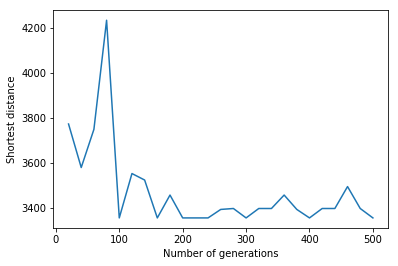

In [7]:
plt.plot(nb_generations, bests)
plt.xlabel("Number of generations")
plt.ylabel("Shortest distance")
plt.show()

### Testing the mutation rate

In [8]:
mutation_rates = np.arange(0, 0.05, 0.005)
bests = []
for mr in mutation_rates:
    for i in np.arange(10):
        setOfAlleles = GAllele.GAlleles(homogeneous=True)
        lst = [ i for i in xrange(len(coords)) ]
        a = GAllele.GAlleleList(lst)
        setOfAlleles.add(a)

        genome = G1DList.G1DList(len(coords))
        genome.setParams(allele=setOfAlleles)

        genome.evaluator.set(eval_func)
        genome.mutator.set(Mutators.G1DListMutatorSwap)
        genome.crossover.set(Crossovers.G1DListCrossoverOX)
        genome.initializator.set(G1DListTSPInitializator)

        ga = GSimpleGA.GSimpleGA(genome)
        ga.setGenerations(200)
        ga.setMinimax(Consts.minimaxType["minimize"])
        ga.setCrossoverRate(1.0)
        ga.setMutationRate(mr)
        ga.setPopulationSize(80)

        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8165.36(8309.06)/5152.72(4978.32)/6804.47(6804.47)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [6016.00(4978.32)/6016.00(4978.32)/6016.00(4978.32)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [6016.00(4978.32)/6016.00(4978.32)/6016.00(4978.32)]
Total time elapsed: 1.199 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8052.16(8510.83)/5375.73(4919.67)/6710.14(6710.14)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [6016.00(4919.67)/6016.00(4919.67)/6016.00(4919.67)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [6016.00(4919.67)/6016.00(4919.67)/6016.00(4919.67)]
Total time elapsed: 1.209 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8086.03(8221.88)/5169.04(5010.85)/6738.36(6738.36)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [5760.00(5010.85)/5760.00(5010.85)/5760.00(5010.85)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [5760.00(5010.85)/5760.00(5010.85)/5760.00(5010.85)]
Total time elapsed: 1.256 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4134.62(5294.50)/3411.60(3354.52)/3445.51(3445.51)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4166.95(5801.87)/3437.30(3354.52)/3472.46(3472.46)]
Total time elapsed: 1.434 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8058.50(8609.25)/5824.64(5459.37)/6715.41(6715.41)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4406.68(4982.59)/3647.81(3628.66)/3672.24(3672.24)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4582.88(6117.04)/3755.78(3628.66)/3819.07(3819.07)]
Total time elapsed: 1.476 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7969.71(8682.10)/5673.20(5153.92)/6641.42(6641.42)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4248.79(5791.55)/3493.95(3392.19)/3540.66(3540.66)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4217.20(5210.23)/3463.71(3392.19)/3514.34(3514.34)]
Total time elapsed: 1.482 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8021.81(8550.15)/5397.03(4888.11)/6684.84(6684.84)]
Gen. 100 (50.00%): Max/Min/A

Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4357.02(6018.47)/3546.81(3354.52)/3630.85(3630.85)]
Total time elapsed: 1.457 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8176.85(8115.14)/4903.10(4989.62)/6814.04(6814.04)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4663.46(6045.78)/3782.64(3598.43)/3886.22(3886.22)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4735.29(6086.81)/3817.91(3598.43)/3946.08(3946.08)]
Total time elapsed: 1.418 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8050.30(8340.13)/5327.95(5029.71)/6708.58(6708.58)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4474.17(5920.39)/3650.06(3497.97)/3728.48(3728.48)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4438.04(5482.48)/3615.29(3497.97)/3698.37(3698.37)]
Total time elapsed: 1.437 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8158.03(8243.61)/5701.85(5632.83)/6798.36(6798.36)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4552.55(6127.00)/3724.51(3580.75)/3793.79(3793.79)]
Gen. 200 (100.00%): Max/Min/

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8134.28(8661.07)/5610.74(5156.95)/6778.56(6778.56)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4651.71(6465.20)/3732.66(3396.36)/3876.42(3876.42)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4653.63(6302.28)/3723.92(3396.36)/3878.02(3878.02)]
Total time elapsed: 1.476 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8163.67(8368.63)/5195.24(4953.05)/6803.06(6803.06)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4803.71(7889.17)/3910.09(3551.68)/4003.09(4003.09)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4575.09(6617.81)/3741.66(3551.68)/3812.57(3812.57)]
Total time elapsed: 1.420 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8129.03(8449.75)/5391.65(5064.37)/6774.19(6774.19)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4930.41(5993.30)/3975.73(3803.78)/4108.68(4108.68)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4545.21(5916.10)/3648.40(3396.36)/3787.68(3787.68)]
Total time elapsed: 1.497 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

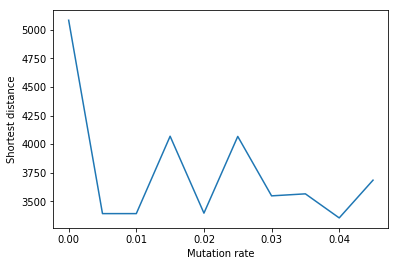

In [9]:
plt.plot(mutation_rates, bests)
plt.xlabel("Mutation rate")
plt.ylabel("Shortest distance")
plt.show()

In [10]:
population_sizes = np.arange(50, 201, 20)
bests = []
for ps in population_sizes:
    for i in np.arange(10):
        setOfAlleles = GAllele.GAlleles(homogeneous=True)
        lst = [ i for i in xrange(len(coords)) ]
        a = GAllele.GAlleleList(lst)
        setOfAlleles.add(a)

        genome = G1DList.G1DList(len(coords))
        genome.setParams(allele=setOfAlleles)

        genome.evaluator.set(eval_func)
        genome.mutator.set(Mutators.G1DListMutatorSwap)
        genome.crossover.set(Crossovers.G1DListCrossoverOX)
        genome.initializator.set(G1DListTSPInitializator)

        ga = GSimpleGA.GSimpleGA(genome)
        ga.setGenerations(200)
        ga.setMinimax(Consts.minimaxType["minimize"])
        ga.setCrossoverRate(1.0)
        ga.setMutationRate(0.02)
        ga.setPopulationSize(ps)

        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8040.27(8699.65)/5471.95(4867.57)/6700.22(6700.22)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4278.85(5484.68)/3501.22(3392.19)/3565.70(3565.70)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4283.29(4999.92)/3480.97(3392.19)/3569.40(3569.40)]
Total time elapsed: 0.913 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7999.11(8192.18)/5230.98(5023.18)/6665.93(6665.93)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4348.66(6199.57)/3548.09(3354.52)/3623.88(3623.88)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4505.80(5952.02)/3618.01(3354.52)/3754.83(3754.83)]
Total time elapsed: 0.990 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8316.99(8428.67)/5610.19(5503.80)/6930.83(6930.83)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4350.09(5814.61)/3547.96(3392.19)/3625.08(3625.08)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4250.20(5425.06)/3485.54(3392.19)/3541.83(3541.83)]
Total time elapsed: 0.970 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4556.36(5945.26)/3700.07(3522.84)/3796.97(3796.97)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4447.05(6044.03)/3647.85(3522.84)/3705.87(3705.87)]
Total time elapsed: 1.541 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8224.13(8255.08)/5438.14(5406.18)/6853.44(6853.44)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4246.86(5753.88)/3480.08(3354.52)/3539.05(3539.05)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4376.07(5776.94)/3546.68(3354.52)/3646.73(3646.73)]
Total time elapsed: 1.563 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8214.14(8850.60)/5753.87(5246.55)/6845.12(6845.12)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4310.31(6584.47)/3534.93(3354.52)/3591.92(3591.92)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4209.27(5776.94)/3460.36(3354.52)/3507.73(3507.73)]
Total time elapsed: 1.580 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8152.13(8588.77)/5380.19(4926.02)/6793.44(6793.44)]
Gen. 100 (50.00%): Max/Min/A

Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [5016.57(7283.66)/4131.42(3998.39)/4180.47(4180.47)]
Total time elapsed: 2.542 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8095.49(8489.60)/5164.58(4702.57)/6746.24(6746.24)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4332.32(5699.72)/3557.00(3456.13)/3610.27(3610.27)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4451.99(6644.57)/3645.80(3456.13)/3709.99(3709.99)]
Total time elapsed: 2.574 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7987.55(8647.02)/5424.04(4813.61)/6656.29(6656.29)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4347.38(5879.17)/3536.66(3354.52)/3622.81(3622.81)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4402.68(5801.87)/3560.75(3354.52)/3668.90(3668.90)]
Total time elapsed: 2.546 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8132.35(8334.72)/5417.26(5214.25)/6776.96(6776.96)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4327.83(6139.89)/3546.69(3396.36)/3606.53(3606.53)]
Gen. 200 (100.00%): Max/Min/

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8109.26(8639.74)/5245.71(4652.26)/6757.72(6757.72)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4617.83(6570.75)/3777.58(3598.43)/3848.19(3848.19)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4434.47(6043.98)/3620.10(3456.13)/3695.39(3695.39)]
Total time elapsed: 3.162 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8176.02(8423.86)/5113.79(4804.69)/6813.35(6813.35)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4389.59(6246.95)/3572.24(3354.52)/3657.99(3657.99)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4377.18(6744.25)/3578.59(3354.52)/3647.65(3647.65)]
Total time elapsed: 3.199 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8089.82(8468.73)/5221.77(4794.68)/6741.52(6741.52)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4261.69(5842.90)/3490.38(3354.52)/3551.41(3551.41)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4413.92(6200.64)/3583.85(3354.52)/3678.27(3678.27)]
Total time elapsed: 3.225 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

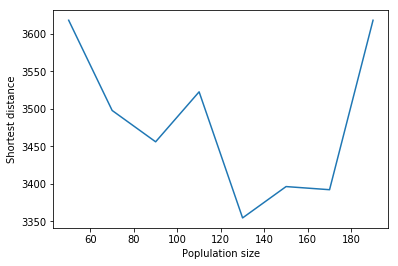

In [11]:
plt.plot(population_sizes, bests)
plt.xlabel("Poplulation size")
plt.ylabel("Shortest distance")
plt.show()

### Testing crossover rate

In [12]:
crossover_rates = np.arange(0.1, 1.1, 0.1)
bests = []
for cr in crossover_rates:
    for i in np.arange(20):
        setOfAlleles = GAllele.GAlleles(homogeneous=True)
        lst = [ i for i in xrange(len(coords)) ]
        a = GAllele.GAlleleList(lst)
        setOfAlleles.add(a)

        genome = G1DList.G1DList(len(coords))
        genome.setParams(allele=setOfAlleles)

        genome.evaluator.set(eval_func)
        genome.mutator.set(Mutators.G1DListMutatorSwap)
        genome.crossover.set(Crossovers.G1DListCrossoverOX)
        genome.initializator.set(G1DListTSPInitializator)

        ga = GSimpleGA.GSimpleGA(genome)
        ga.setGenerations(200)
        ga.setMinimax(Consts.minimaxType["minimize"])
        ga.setCrossoverRate(cr)
        ga.setMutationRate(0.02)
        ga.setPopulationSize(100)

        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8066.68(8337.55)/5457.42(5202.60)/6722.24(6722.24)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4520.15(6003.17)/3704.12(3580.75)/3766.79(3766.79)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4352.65(5944.51)/3573.65(3456.13)/3627.21(3627.21)]
Total time elapsed: 1.371 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8257.49(8207.02)/4939.91(5011.11)/6881.24(6881.24)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4651.21(6671.22)/3810.63(3640.27)/3876.01(3876.01)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4406.62(5822.66)/3612.69(3497.97)/3672.18(3672.18)]
Total time elapsed: 1.370 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8115.71(8535.53)/4832.86(4233.76)/6763.09(6763.09)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4254.69(5555.78)/3478.18(3354.52)/3545.57(3545.57)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4280.22(6749.55)/3519.26(3354.52)/3566.85(3566.85)]
Total time elapsed: 1.373 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4400.76(6314.16)/3623.67(3509.84)/3667.30(3667.30)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4540.03(5858.11)/3683.61(3509.84)/3783.36(3783.36)]
Total time elapsed: 1.413 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8005.94(7952.59)/4546.83(4631.77)/6671.62(6671.62)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4745.55(6219.15)/3890.77(3771.80)/3954.63(3954.63)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4793.79(6035.02)/3907.49(3771.80)/3994.83(3994.83)]
Total time elapsed: 1.407 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8241.31(8495.66)/5443.58(5179.86)/6867.76(6867.76)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [5419.30(6691.54)/4413.55(4269.12)/4516.08(4516.08)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [5357.25(6127.46)/4359.55(4269.12)/4464.37(4464.37)]
Total time elapsed: 1.491 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7977.13(8127.92)/4850.05(4646.18)/6647.61(6647.61)]
Gen. 100 (50.00%): Max/Min/A

Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4515.06(5844.15)/3665.39(3493.79)/3762.55(3762.55)]
Total time elapsed: 1.419 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8116.02(8616.26)/5460.00(4978.00)/6763.35(6763.35)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4821.38(6230.55)/3917.71(3742.17)/4017.81(4017.81)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4753.23(6172.04)/3882.61(3742.17)/3961.02(3961.02)]
Total time elapsed: 1.427 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8119.50(8643.69)/5601.45(5150.25)/6766.25(6766.25)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4410.80(7014.91)/3627.34(3456.13)/3675.67(3675.67)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4426.00(5903.48)/3611.01(3456.13)/3688.33(3688.33)]
Total time elapsed: 1.433 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8114.06(8440.19)/5246.59(4881.20)/6761.72(6761.72)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4712.08(6936.36)/3846.28(3618.41)/3926.73(3926.73)]
Gen. 200 (100.00%): Max/Min/

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8280.30(8547.08)/5265.21(4949.14)/6900.25(6900.25)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4774.13(6058.51)/3847.48(3636.09)/3978.44(3978.44)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4651.33(6144.32)/3794.08(3636.09)/3876.11(3876.11)]
Total time elapsed: 1.517 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8004.58(8223.42)/5402.96(5195.05)/6670.49(6670.49)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4681.00(6173.40)/3826.74(3685.02)/3900.83(3900.83)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4551.29(6990.19)/3746.64(3598.43)/3792.74(3792.74)]
Total time elapsed: 1.451 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8243.91(8357.99)/5078.61(4929.87)/6869.93(6869.93)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4313.53(5598.12)/3508.46(3354.52)/3594.61(3594.61)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4342.17(6241.12)/3545.64(3354.52)/3618.48(3618.48)]
Total time elapsed: 1.505 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [5269.16(6410.22)/4333.42(4258.66)/4390.97(4390.97)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4527.72(6592.60)/3672.27(3396.36)/3773.10(3773.10)]
Total time elapsed: 1.561 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8154.98(8046.89)/4765.45(4926.91)/6795.81(6795.81)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4354.19(5753.88)/3534.95(3354.52)/3628.50(3628.50)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4275.97(6080.68)/3504.20(3354.52)/3563.31(3563.31)]
Total time elapsed: 1.550 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8167.75(8152.22)/5091.16(5110.74)/6806.46(6806.46)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [5368.40(6652.72)/4373.22(4229.03)/4473.67(4473.67)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [5335.35(6947.39)/4368.95(4229.03)/4446.12(4446.12)]
Total time elapsed: 1.621 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8256.34(8465.30)/5251.22(5003.84)/6880.28(6880.28)]
Gen. 100 (50.00%): Max/Min/A

Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4682.31(6016.92)/3842.98(3742.17)/3901.93(3901.93)]
Total time elapsed: 1.652 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7960.28(8365.61)/5026.90(4536.04)/6633.57(6633.57)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4316.99(5884.74)/3534.23(3396.36)/3597.50(3597.50)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4436.02(6858.64)/3626.46(3396.36)/3696.68(3696.68)]
Total time elapsed: 1.672 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8152.21(8562.32)/5338.34(4899.12)/6793.51(6793.51)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [5371.21(7071.69)/4434.92(4356.86)/4476.01(4476.01)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [5431.71(6839.67)/4460.06(4356.86)/4526.42(4526.42)]
Total time elapsed: 1.610 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8087.29(8874.27)/5443.91(4687.52)/6739.41(6739.41)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4261.35(5842.90)/3490.20(3354.52)/3551.13(3551.13)]
Gen. 200 (100.00%): Max/Min/

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7921.97(8256.47)/5160.76(4795.72)/6601.64(6601.64)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4278.35(5607.39)/3504.84(3392.19)/3565.29(3565.29)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4300.40(5880.57)/3523.91(3392.19)/3583.66(3583.66)]
Total time elapsed: 1.678 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8109.15(8096.52)/5126.48(5141.71)/6757.62(6757.62)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4589.96(5964.63)/3732.07(3565.15)/3824.96(3824.96)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4526.84(6412.48)/3713.15(3565.15)/3772.37(3772.37)]
Total time elapsed: 1.699 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8005.91(8159.10)/5353.69(5202.39)/6671.59(6671.59)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [5171.80(6564.23)/4220.37(4075.85)/4309.83(4309.83)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [5071.53(6178.94)/4161.16(4075.85)/4226.27(4226.27)]
Total time elapsed: 1.670 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [5267.35(5835.63)/4316.26(4268.88)/4389.46(4389.46)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [5411.48(6668.24)/4409.01(4268.88)/4509.56(4509.56)]
Total time elapsed: 1.712 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8131.02(8351.52)/5075.05(4798.31)/6775.85(6775.85)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4363.71(6622.93)/3577.97(3396.36)/3636.43(3636.43)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4379.49(5721.05)/3560.35(3396.36)/3649.57(3649.57)]
Total time elapsed: 1.709 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8219.15(8646.10)/5775.62(5440.98)/6849.29(6849.29)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4723.35(6889.95)/3884.43(3742.17)/3936.12(3936.12)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4874.72(6189.52)/3940.01(3742.17)/4062.26(4062.26)]
Total time elapsed: 1.673 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8125.19(8080.61)/4659.72(4729.23)/6770.99(6770.99)]
Gen. 100 (50.00%): Max/Min/A

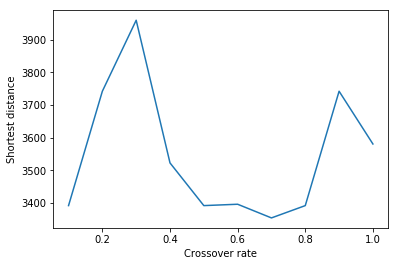

In [13]:
plt.plot(crossover_rates, bests)
plt.xlabel("Crossover rate")
plt.ylabel("Shortest distance")
plt.show()

### Testing the selection method

In [14]:
best_length = []
for i in np.arange(30):
    setOfAlleles = GAllele.GAlleles(homogeneous=True)
    lst = [ i for i in xrange(len(coords)) ]
    a = GAllele.GAlleleList(lst)
    setOfAlleles.add(a)

    genome = G1DList.G1DList(len(coords))
    genome.setParams(allele=setOfAlleles)

    genome.evaluator.set(eval_func)
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(G1DListTSPInitializator)

    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(200)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(0.8)
    ga.setMutationRate(0.02)
    ga.setPopulationSize(100)
    # ga.selector.set(Selectors.GRouletteWheel)
    # ga.selector.set(Selectors.GTournamentSelector)
    ga.selector.set(Selectors.GRankSelector)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(best_length)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8122.06(8323.42)/5233.09(5004.71)/6768.38(6768.38)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4712.53(6117.04)/3820.07(3628.66)/3927.11(3927.11)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4647.83(6117.04)/3788.77(3628.66)/3873.19(3873.19)]
Total time elapsed: 1.711 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8217.62(8264.58)/5126.52(5067.50)/6848.02(6848.02)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4573.16(6235.11)/3733.68(3565.15)/3810.96(3810.96)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4415.91(6060.88)/3579.34(3354.52)/3679.93(3679.93)]
Total time elapsed: 1.726 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8036.54(8450.34)/5088.81(4591.95)/6697.12(6697.12)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4539.23(6351.47)/3714.66(3551.68)/3782.69(3782.69)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4502.62(7189.82)/3708.42(3551.68)/3752.18(3752.18)]
Total time elapsed: 1.692 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4632.46(5970.84)/3779.86(3640.27)/3860.38(3860.38)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4542.10(5831.58)/3646.03(3409.16)/3785.08(3785.08)]
Total time elapsed: 1.650 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8177.99(8810.18)/5543.23(4953.35)/6814.99(6814.99)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4281.57(6382.40)/3513.86(3354.52)/3567.98(3567.98)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4294.03(5679.21)/3502.11(3354.52)/3578.36(3578.36)]
Total time elapsed: 1.667 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8083.75(8582.92)/5297.31(4764.10)/6736.46(6736.46)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4304.04(5776.94)/3510.66(3354.52)/3586.70(3586.70)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4329.62(6130.51)/3535.50(3354.52)/3608.01(3608.01)]
Total time elapsed: 1.661 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7936.97(8316.84)/5230.79(4833.55)/6614.14(6614.14)]
Gen. 100 (50.00%): Max/Min/A

In [15]:
best_length = []
for i in np.arange(30):
    setOfAlleles = GAllele.GAlleles(homogeneous=True)
    lst = [ i for i in xrange(len(coords)) ]
    a = GAllele.GAlleleList(lst)
    setOfAlleles.add(a)

    genome = G1DList.G1DList(len(coords))
    genome.setParams(allele=setOfAlleles)

    genome.evaluator.set(eval_func)
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(G1DListTSPInitializator)

    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(200)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(0.8)
    ga.setMutationRate(0.02)
    ga.setPopulationSize(100)
    ga.selector.set(Selectors.GTournamentSelector)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(np.array(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8044.56(8423.45)/4872.55(4355.06)/6703.80(6703.80)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [8793.77(8559.86)/3790.43(4355.06)/7328.14(7328.14)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [8930.58(8737.43)/3663.31(4153.68)/7442.15(7442.15)]
Total time elapsed: 2.100 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8082.12(8359.66)/5375.45(5095.30)/6735.10(6735.10)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [8890.67(8537.54)/3693.36(4578.83)/7408.89(7408.89)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [8825.16(8556.52)/3958.66(4578.83)/7354.30(7354.30)]
Total time elapsed: 2.081 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8009.58(8708.42)/5732.46(5239.22)/6674.65(6674.65)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [8867.41(8603.01)/4392.30(4928.51)/7389.51(7389.51)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [8704.94(8306.93)/2944.88(4127.06)/7254.12(7254.12)]
Total time elapsed: 2.058 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [8658.36(8196.29)/3724.96(4842.56)/7215.30(7215.30)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [8834.14(8483.91)/3803.15(4649.63)/7361.78(7361.78)]
Total time elapsed: 2.090 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8055.70(8143.15)/5309.71(5218.31)/6713.08(6713.08)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [8869.32(8598.44)/4400.67(4948.65)/7391.10(7391.10)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [8572.72(8239.19)/4098.09(4809.08)/7143.93(7143.93)]
Total time elapsed: 2.077 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8251.33(8448.52)/5568.82(5381.37)/6876.11(6876.11)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [8883.08(8577.55)/4091.13(4774.49)/7402.56(7402.56)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [8727.66(8369.89)/3794.42(4650.00)/7273.05(7273.05)]
Total time elapsed: 2.134 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8054.32(7892.86)/4787.33(5018.81)/6711.93(6711.93)]
Gen. 100 (50.00%): Max/Min/A

In [16]:
print(np.mean(best_length))

4536.4170730492615


In [17]:
best_length = []
for i in np.arange(30):
    setOfAlleles = GAllele.GAlleles(homogeneous=True)
    lst = [ i for i in xrange(len(coords)) ]
    a = GAllele.GAlleleList(lst)
    setOfAlleles.add(a)

    genome = G1DList.G1DList(len(coords))
    genome.setParams(allele=setOfAlleles)

    genome.evaluator.set(eval_func)
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(G1DListTSPInitializator)

    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(200)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(0.8)
    ga.setMutationRate(0.02)
    ga.setPopulationSize(100)
    ga.selector.set(Selectors.GRouletteWheel)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(np.array(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8267.33(8277.64)/5360.87(5349.44)/6889.44(6889.44)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [7592.68(8077.96)/4684.68(4054.77)/6327.23(6327.23)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [7839.56(8440.48)/4749.31(3928.99)/6532.97(6532.97)]
Total time elapsed: 1.853 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7990.07(8506.73)/5538.86(5104.51)/6658.39(6658.39)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [7346.99(7948.06)/4499.89(3703.41)/6122.49(6122.49)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [7682.54(7911.05)/3915.25(3471.43)/6402.12(6402.12)]
Total time elapsed: 1.844 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8078.20(8388.28)/5342.36(5022.36)/6731.83(6731.83)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [7649.19(8013.16)/4149.53(3514.36)/6374.33(6374.33)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [7434.30(7953.06)/4305.53(3514.36)/6195.25(6195.25)]
Total time elapsed: 1.842 seconds.
Gen. 0 (0.00%): Max/Min/Avg 

Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [7509.82(7719.78)/3818.42(3409.16)/6258.19(6258.19)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [7534.58(8324.55)/4517.29(3409.16)/6278.82(6278.82)]
Total time elapsed: 1.837 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8249.09(8644.66)/5556.44(5177.27)/6874.24(6874.24)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [7749.38(8473.08)/4870.71(3981.42)/6457.82(6457.82)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [7703.38(8284.81)/4403.45(3490.46)/6419.49(6419.49)]
Total time elapsed: 1.843 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8227.09(8307.32)/5059.41(4954.29)/6855.91(6855.91)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [7592.08(8050.11)/4523.54(3870.82)/6326.73(6326.73)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [7493.51(7800.41)/4316.54(3842.75)/6244.59(6244.59)]
Total time elapsed: 1.826 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8274.22(8511.88)/5486.77(5244.05)/6895.18(6895.18)]
Gen. 100 (50.00%): Max/Min/A

### Plot the path

In [18]:
setOfAlleles = GAllele.GAlleles(homogeneous=True)
lst = [ i for i in xrange(len(coords)) ]
a = GAllele.GAlleleList(lst)
setOfAlleles.add(a)

genome = G1DList.G1DList(len(coords))
genome.setParams(allele=setOfAlleles)

genome.evaluator.set(eval_func)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.crossover.set(Crossovers.G1DListCrossoverOX)
genome.initializator.set(G1DListTSPInitializator)

ga = GSimpleGA.GSimpleGA(genome)
ga.setGenerations(200)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setCrossoverRate(0.8)
ga.setMutationRate(0.02)
ga.setPopulationSize(100)
ga.selector.set(Selectors.GRankSelector)

ga.evolve(freq_stats=100)
best = ga.bestIndividual()
print best
print(tour_length(spherical_distances, best))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8169.52(8285.97)/5300.21(5171.26)/6807.93(6807.93)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [4337.62(5814.61)/3541.57(3392.19)/3614.68(3614.68)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [4394.74(5814.61)/3570.37(3392.19)/3662.28(3662.28)]
Total time elapsed: 1.908 seconds.
- GenomeBase
	Score:			 3392.187220
	Fitness:		 3570.366035

	Params:		 {'allele': - GAlleles
	Homogeneous:	 True
	List size:	 1
	Alleles:

Allele for 0 position:
- GAlleleList
	List size:	 14
	Allele Options:	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

}

	Slot [Evaluator] (Count: 1)
		Name: eval_func - Weight: 0.50
		Doc:  The evaluation function 
	Slot [Initializator] (Count: 1)
		Name: G1DListTSPInitializator - Weight: 0.50
		Doc:  The initializator for the TSP 
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator
   
   .. note:: this mutator is :term:`Data Type Independent`

   
	Slot [Crossover] 

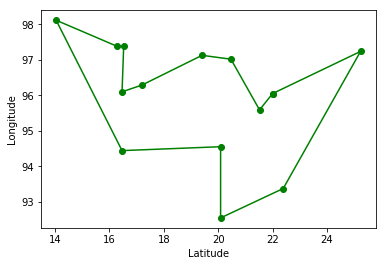

In [19]:
res_lat = []
res_lon = []
best.append(best[0])
for city_index in best:
    res_lat.append(LAT[city_index])
    res_lon.append(LON[city_index])
    
plt.plot(res_lat, res_lon, '-o', color='g')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()